In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [8]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [19]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [20]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [76]:
Inspector = inspect(engine)
Column = inspector.get_columns('measurement')
for columns in Column:
    print(columns["name"],columns["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [75]:
Inspector = inspect(engine)
Column = inspector.get_columns('station')
for columns in Column:
    print(columns["name"],columns["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [80]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date 

'2017-08-23'

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [206]:
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
last_twelve_months = dt.date(2017, 8, 23) - dt.timedelta(days=366)
print('Query Date:',last_twelve_months)

Query Date: 2016-08-22


In [218]:
# Perform a query to retrieve the data and precipitation scores
prcp_score = session.query(Measurement.date, func.max(Measurement.prcp)).\
             filter(Measurement.date > last_twelve_months).\
              group_by(Measurement.date).\
             all()
prcp_score 

[('2016-08-23', 1.79),
 ('2016-08-24', 2.28),
 ('2016-08-25', 0.21),
 ('2016-08-26', 0.04),
 ('2016-08-27', 0.18),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.05),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-02', 0.19),
 ('2016-09-03', 1.0),
 ('2016-09-04', 0.74),
 ('2016-09-05', 0.18),
 ('2016-09-06', 1.0),
 ('2016-09-07', 1.35),
 ('2016-09-08', 0.22),
 ('2016-09-09', 0.35),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.6),
 ('2016-09-12', 1.04),
 ('2016-09-13', 1.2),
 ('2016-09-14', 6.7),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.36),
 ('2016-09-18', 0.42),
 ('2016-09-19', 0.25),
 ('2016-09-20', 0.43),
 ('2016-09-21', 1.02),
 ('2016-09-22', 0.75),
 ('2016-09-23', 0.94),
 ('2016-09-24', 0.27),
 ('2016-09-25', 0.04),
 ('2016-09-26', 1.02),
 ('2016-09-27', 1.0),
 ('2016-09-28', 0.08),
 ('2016-09-29', 1.49),
 ('2016-09-30', 0.38),
 ('2016-10-01', 1.02),
 ('2016-10-02', 0.61),
 ('2016-10-03', 0.46),
 ('2016-10-04', 3.46),
 ('2016-10-05', 0.

In [219]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_score, columns = ['date','prcp'])

prcp_df.set_index('date', inplace=True)
prcp_df.head()

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18


In [220]:
# Sort the dataframe by date
prcp_df.sort_values('date')

,prcp
date,
2016-08-23,1.79
2016-08-24,2.28
2016-08-25,0.21
2016-08-26,0.04
2016-08-27,0.18
...,...
2017-08-19,0.09
2017-08-20,0.01
2017-08-21,0.56


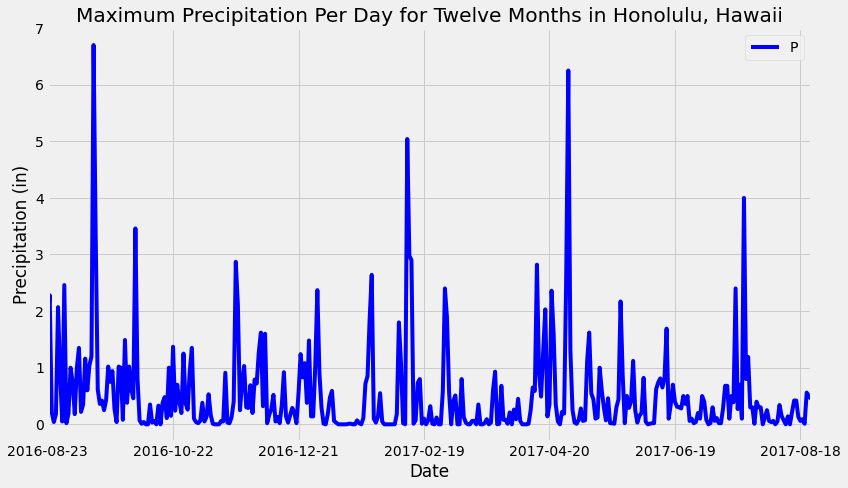

In [221]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(12,7), xticks=(0,60,120,180,240,300,360), 
            color='blue')
#plt.figure(figsize=(10,5))
plt.xlim(-5,370)
plt.ylim(-0.3,7)
plt.yticks(size=14)
plt.xticks(size=14)
plt.legend('Precipitation')
plt.title('Maximum Precipitation Per Day for Twelve Months in Honolulu, Hawaii')
plt.xlabel('Date')
plt.ylabel('Precipitation (in)')
plt.autoscale(enable=True, axis='x',tight=True)
plt.tight_layout()
plt.savefig("./Images/plot.png")
plt.show()

In [228]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_data = (session.query(Measurement.date, Measurement.prcp).\
               filter(Measurement.date > last_twelve_months).all())

In [229]:
summary_data_df = pd.DataFrame(summary_data, columns=['date','prcp'])
summary_data_df.dropna()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [230]:
#summary statistics for the precipitation data
summary_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [133]:
# Design a query to calculate the total number stations in the dataset
total_station = session.query(Station).count()
print(f'The total number of stations are {total_station}.')

The total number of stations are 9.


In [237]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_results = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.station).desc()).all()
station_results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [239]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_row = station_results[0][0]


sel = [func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]

most_active = (session.query(*sel).\
            filter(Measurement.station==most_row).all())
most_active

[(54.0, 85.0, 71.66378066378067)]

In [162]:
# Using the most active station id, Query the last 12 months of temperature observation data for this station and 
most_active_temp = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station == most_row).\
                    filter(Measurement.date > last_twelve_months).all()

most_active_temp_df = pd.DataFrame(most_active_temp)
most_active_temp_df.set_index('date', inplace=True)
most_active_temp_df.head()

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0


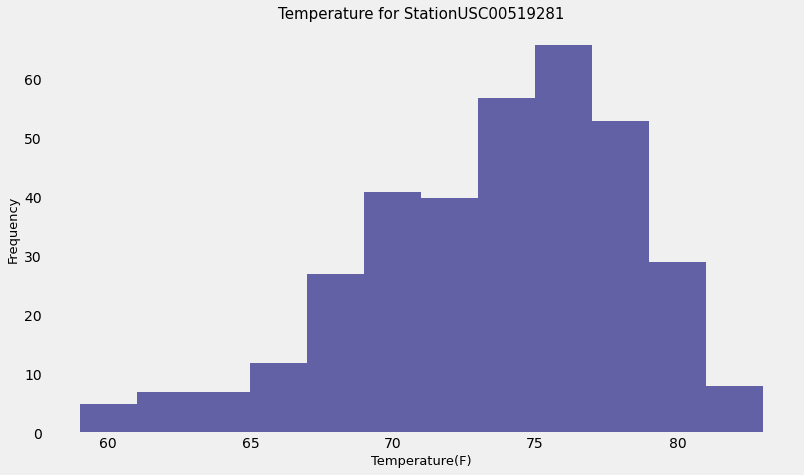

In [240]:
#plot the results as a histogram
#plt.rcParams=['figsize.figsize']=(12,7)

plt.hist(most_active_temp_df['tobs'], bins=12, alpha=0.6, color ='xkcd:deep blue')
plt.grid()
plt.gcf().set_size_inches(12,7)
plt.title("Temperature for Station" + most_row, fontsize=15)
plt.ylabel('Frequency',fontsize=13)
plt.xlabel('Temperature(F)', fontsize=13)
plt.savefig("./Images/hist.png")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()